# Predicting Bank Product Uptake

## Problem Statement
In the banking industry, banks do carry out a plethora of marketing campaigns to introduce new products. Sometimes, the customers don't subscribe to the offers being marketed to them and this takes a toll on the bank with regards to funds been used to market such a product.

Based on this, the need to actually know if customers will signup to a product being released and also target those exact customers is very important.

## Problem Description
The goal of this project is to build a machine learning model that is able to predict if customers will subscribe to term deposit.


In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data Inspection

### Structure of dataset
- The dataset was gotten from Kaggle.
- Dataset contains 4522 rows and 17 columns.
- There were no missing values in the dataset.
- A significant feature in the datset is that all the columns have data type of object, even where the values are integers

#### Features in the dataset and meaning

  - age (numeric)
  - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
  - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  - education (categorical: "unknown","secondary","primary","tertiary")
  - default: has credit in default? (binary: "yes","no")
  - balance: average yearly balance, in euros (numeric) 
  - housing: has housing loan? (binary: "yes","no")
  - loan: has personal loan? (binary: "yes","no")
  
   #### related with the last contact of the current campaign:
   
  - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  - day: last contact day of the month (numeric)
  - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - duration: last contact duration, in seconds (numeric)
  
   #### other attributes:
  - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  - previous: number of contacts performed before this campaign and for this client (numeric)
  - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (**desired target**):
  - y - has the client subscribed a term deposit? (binary: "yes","no")

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


#### Renaming the Columns

In [4]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [5]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In the 2 cells above, I was trying to get a header for each column since it was muffled within the initial dataset.

In [6]:
#inspect the data
#checking for null or missing values

data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#from here, we can see that some integers are recorded as strings; this is to be corrected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB


In [8]:
# This gives the value of rows and columns
data.shape

(4521, 17)

In [9]:
#This argument lists out all the column headers.
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
#This gives a statistical outlook on the dataset
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,67,12,3,4,2,2353,2,2,3,31,12,875,32,292,24,4,2
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


In [11]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
# Creating a copy of the dataset to preserve the original data.
df = data.copy()

# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

In [13]:
#Converting some strings into integers.
df[["age", "balance","day", "duration", "campaign", "pdays", "previous"]] = df[["age", "balance", "day", "duration", "campaign", "pdays", "previous"]].apply(pd.to_numeric)

In [14]:
# Confirming if some Strings are rightly converted into Integers
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
# Renaming Columns
df.rename(columns = {'housing':'housing_loan', 'loan':'personal_loan',
                              'pdays':'last_day_of_contact', 'previous':'previous_contacting', 'poutcome':'marketing_outcome', 'y':'subscribed?'}, inplace = True)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Visualization

In this section would deal with visualizing important relationships in the data set.

## Univariate Analysis


Text(0, 0.5, 'Age Group')

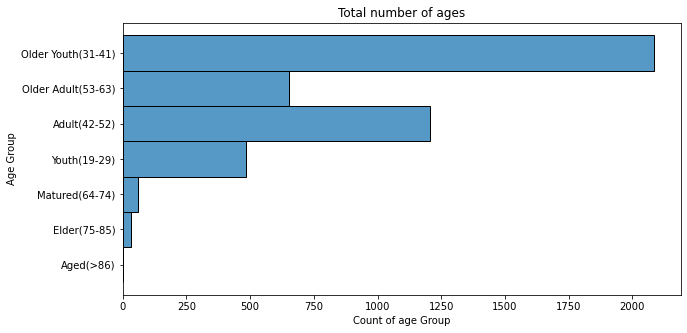

In [17]:
# Visualize Age group

def age_bracket(age):
    if age <= 29:
        return 'Youth(19-29)'
    elif age <= 41:
        return 'Older Youth(31-41)'
    elif age <= 52:
        return 'Adult(42-52)'
    elif age <= 63:
        return 'Older Adult(53-63)'
    elif age <= 74:
        return 'Matured(64-74)'
    elif age <= 85:
        return 'Elder(75-85)'
    else:
        return 'Aged(>86)'
    
#recreate a new column for age category
df['age_group'] = df['age'].apply(age_bracket)


# visualize customer age group
plt.figure(figsize=(10,5))
sns.histplot(y='age_group', data=df)
plt.title('Total number of ages')
plt.xlabel('Count of age Group')
plt.ylabel('Age Group')


- Majority of the clients in our dataset are within the age range of 31 - 41 years and were categorized as Older Youth.

Text(0, 0.5, 'Job Type')

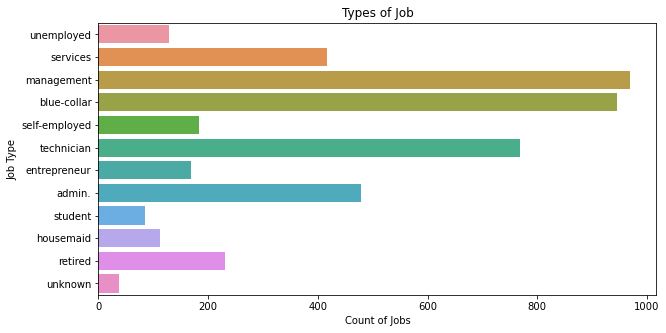

In [18]:
# visualize job type

plt.figure(figsize=(10,5))
sns.countplot(y='job', data=df)
plt.title('Types of Job')
plt.xlabel('Count of Jobs')
plt.ylabel('Job Type')


- The category of job type which most customers fall under is Management closely followed by blue-collar. Students and unknown represent the least job type.

<AxesSubplot:xlabel='personal_loan', ylabel='count'>

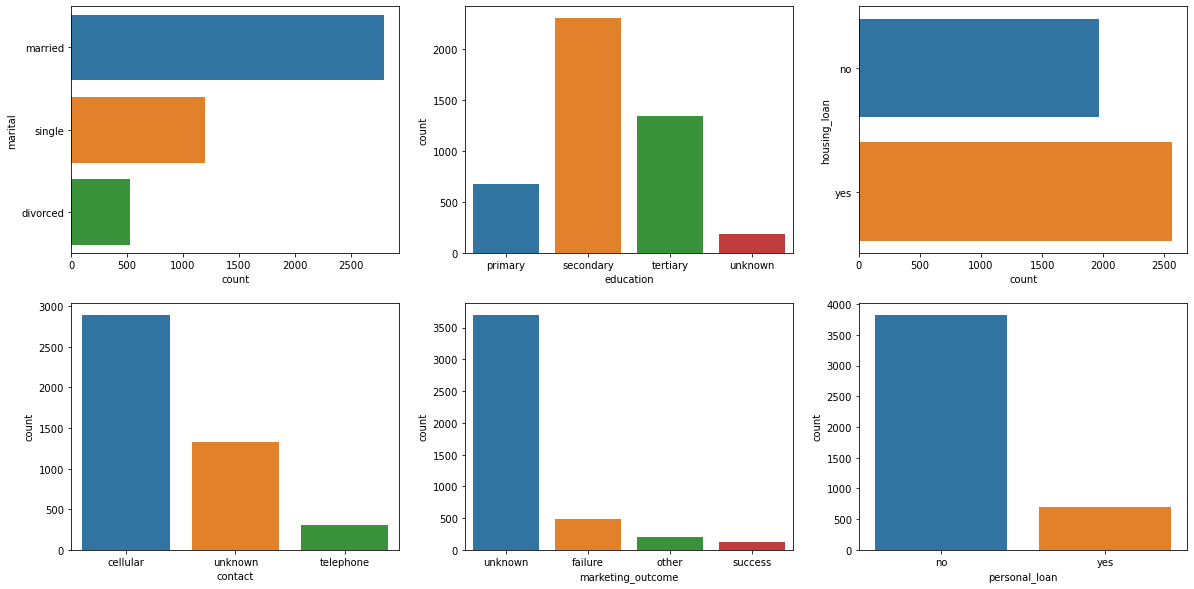

In [19]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
sns.countplot(y='marital', data=df, ax= axes[0,0])
sns.countplot(x='education',data=df, ax= axes[0,1])
sns.countplot(y='housing_loan',data=df, ax= axes[0,2])
sns.countplot(x='contact', data=df, ax= axes[1,0])
sns.countplot(x='marketing_outcome', data=df, ax= axes[1,1])
sns.countplot(x='personal_loan', data=df, ax= axes[1,2])


- The plots above gives information about the various distribution of customers ranging from marital status to their level of education, they type of loans they have opt for etc.

## Bivariate Analysis


<AxesSubplot:title={'center':'Subscribed against Education'}, xlabel='education', ylabel='count'>

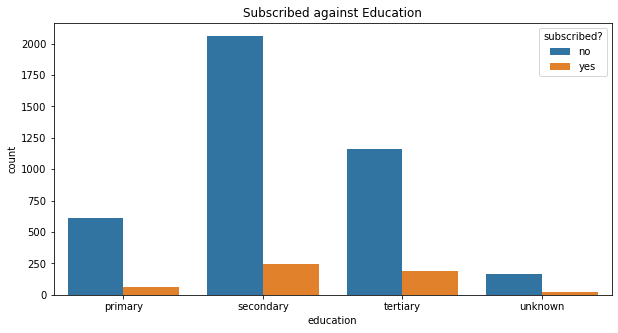

In [20]:
#Subscribed by education

plt.figure(figsize = (10,5))
plt.title('Subscribed against Education')
sns.countplot(x="education", data=df, hue ="subscribed?")

- From this visualization we can see that customers who have secondary education subscribed to term deposit closely followed by those with tertiary education.

Text(0.5, 1.0, 'Housing loan against Subscribed')

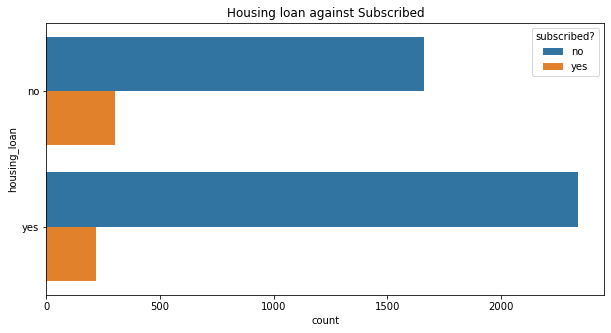

In [21]:
# Housing loan against subscribed
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="housing_loan", hue="subscribed?")
plt.title('Housing loan against Subscribed')

- It can be seen that most people who do not have housing loan will subscribe to term deposit although the difference is not much compared to those that have hosuing loan.


Text(0.5, 0, 'Contact')

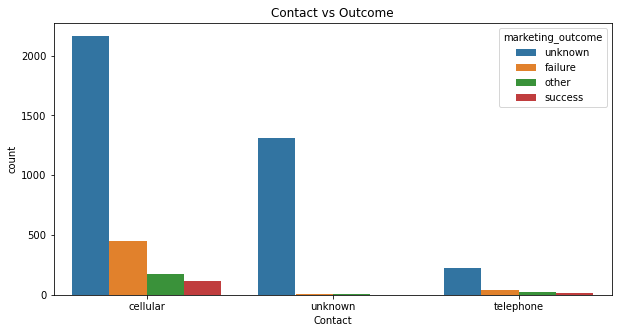

In [22]:
# contact vs outcome
plt.figure(figsize=(10,5))
plt.title("Contact vs Outcome")
sns.countplot(x='contact', data=df, hue='marketing_outcome')
plt.xlabel('Contact')


- From previous marketing campaign, success was recorded more when clients were contacted via cellular, followed by telephone. The failure rate was highest when clients were contacted via cellular as well.

Text(0, 0.5, 'Age')

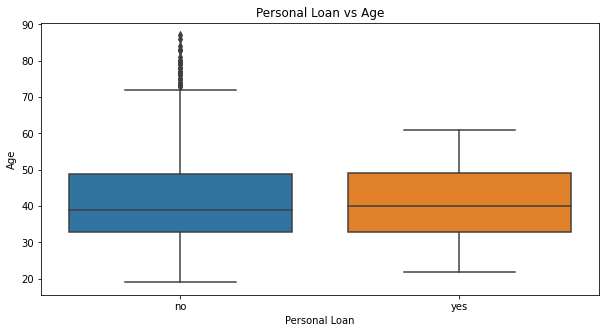

In [23]:
# Personal loan against age
plt.figure(figsize=(10,5))
plt.title("Personal Loan vs Age")
sns.boxplot(x='personal_loan', y='age', data=df, orient='v')
plt.xlabel('Personal Loan')
plt.ylabel('Age')

- We can see that the minimum age, the median and maximum ages are the same for customers that have personal loans and dont have personal loans as well. However, we can spot some outliers which tells us about the ages above the maximum age that dont have personal loans.

## Multivariate Analysis


<AxesSubplot:>

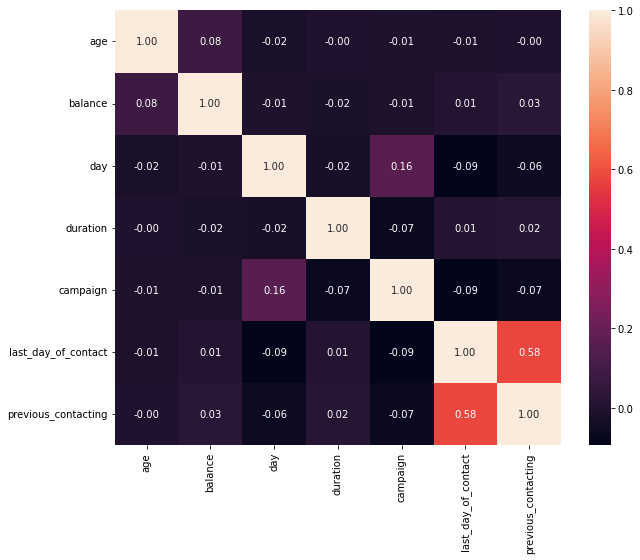

In [24]:
# Correlation between numeric columns
core = df.corr()
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(core, annot=True, fmt='.2f')

- There is a positive correlation between number of contacts performed before this campaign and number of days that passed by after the client was last contacted from a previous campaign. There rest showed negative correlation.

Text(0.5, 1.0, 'Subscribed against Age and Education')

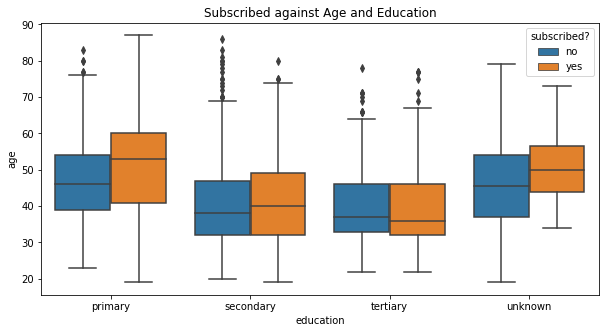

In [25]:
# Subscribed against Age and Education
plt.figure(figsize=(10,5))
sns.boxplot(x="education", y="age", hue="subscribed?", data=df)
plt.title('Subscribed against Age and Education')

- With regards to the age of customers who would subscribe to term deposit and their level of education, we can see that the highest age is 60 years with primary education followed by the unknown educational category with age above 55.

# Summary of Findings

1. Management is the highest job type closely followed by blue-collar. Students and unknown represent the least job type.
2. Majority of the customers that didn't have housing loan subscribed to term deposit comared to those that didn't have housing loans.
3. With regards to the previous marketing campaign, reaching out to customers via cellular was successfull compared to other means.

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [26]:
# confirm if the target column is balanced
df['subscribed?'].groupby(df['subscribed?']).count()

subscribed?
no     4000
yes     521
Name: subscribed?, dtype: int64

In [27]:
#convert categorical values in subscribed? column to int
df['subscribed?'] = (df['subscribed?'] == 'yes').astype(int)

In [28]:
# Choose target column
y = df['subscribed?']


In [29]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0,Older Youth(31-41)
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0,Older Youth(31-41)
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0,Older Youth(31-41)
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0,Older Youth(31-41)
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0,Older Adult(53-63)


In [30]:
# replace housing loan and personal loan columns with no=0 and yes=1
df['housing_loan'] = (df['housing_loan'] == 'yes').astype(int)
df['personal_loan'] = (df['personal_loan'] == 'yes').astype(int)

In [31]:
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,last_day_of_contact,previous_contacting,marketing_outcome,subscribed?,age_group
1,30,unemployed,married,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,Older Youth(31-41)
2,33,services,married,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,0,Older Youth(31-41)
3,35,management,single,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,Older Youth(31-41)
4,30,management,married,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,Older Youth(31-41)
5,59,blue-collar,married,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,Older Adult(53-63)


In [32]:
# Selecting categorical variables
features = ['job', 'marital','education','default','contact', 'month', 'marketing_outcome', 'age_group']

In [33]:
#  use pd.get_dummies() for one hot encoding
category_dummies = pd.get_dummies(df[features])
category_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adult(42-52),age_group_Aged(>86),age_group_Elder(75-85),age_group_Matured(64-74),age_group_Older Adult(53-63),age_group_Older Youth(31-41),age_group_Youth(19-29)
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [34]:
#joining the encoded variables back to the main dataframe using pd.concat()
df = pd.concat([df,category_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing_loan,personal_loan,contact,day,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adult(42-52),age_group_Aged(>86),age_group_Elder(75-85),age_group_Matured(64-74),age_group_Older Adult(53-63),age_group_Older Youth(31-41),age_group_Youth(19-29)
1,30,unemployed,married,primary,no,1787,0,0,cellular,19,...,0,0,1,0,0,0,0,0,1,0
2,33,services,married,secondary,no,4789,1,1,cellular,11,...,0,0,0,0,0,0,0,0,1,0
3,35,management,single,tertiary,no,1350,1,0,cellular,16,...,0,0,0,0,0,0,0,0,1,0
4,30,management,married,tertiary,no,1476,1,1,unknown,3,...,0,0,1,0,0,0,0,0,1,0
5,59,blue-collar,married,secondary,no,0,1,0,unknown,5,...,0,0,1,0,0,0,0,1,0,0


In [35]:
#removing the initial categorical columns now that we have encoded them by dropping the list of categorical columns
df = df.drop(features,axis=1)
df.head()

,age,balance,housing_loan,personal_loan,day,duration,campaign,last_day_of_contact,previous_contacting,subscribed?,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adult(42-52),age_group_Aged(>86),age_group_Elder(75-85),age_group_Matured(64-74),age_group_Older Adult(53-63),age_group_Older Youth(31-41),age_group_Youth(19-29)
1,30,1787,0,0,19,79,1,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,4789,1,1,11,220,1,339,4,0,...,0,0,0,0,0,0,0,0,1,0
3,35,1350,1,0,16,185,1,330,1,0,...,0,0,0,0,0,0,0,0,1,0
4,30,1476,1,1,3,199,4,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,59,0,1,0,5,226,1,-1,0,0,...,0,0,1,0,0,0,0,1,0,0


## Select Features

In [36]:
# Select features by dropping target column
X = df.drop('subscribed?', axis=1)
X.head()

,age,balance,housing_loan,personal_loan,day,duration,campaign,last_day_of_contact,previous_contacting,job_admin.,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adult(42-52),age_group_Aged(>86),age_group_Elder(75-85),age_group_Matured(64-74),age_group_Older Adult(53-63),age_group_Older Youth(31-41),age_group_Youth(19-29)
1,30,1787,0,0,19,79,1,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,4789,1,1,11,220,1,339,4,0,...,0,0,0,0,0,0,0,0,1,0
3,35,1350,1,0,16,185,1,330,1,0,...,0,0,0,0,0,0,0,0,1,0
4,30,1476,1,1,3,199,4,-1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,59,0,1,0,5,226,1,-1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [37]:
df.describe()

,age,balance,housing_loan,personal_loan,day,duration,campaign,last_day_of_contact,previous_contacting,subscribed?,...,marketing_outcome_other,marketing_outcome_success,marketing_outcome_unknown,age_group_Adult(42-52),age_group_Aged(>86),age_group_Elder(75-85),age_group_Matured(64-74),age_group_Older Adult(53-63),age_group_Older Youth(31-41),age_group_Youth(19-29)
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240,...,0.043574,0.028534,0.819509,0.266313,0.000442,0.007299,0.013493,0.144658,0.461181,0.106614
std,10.576211,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347,...,0.204169,0.166510,0.384638,0.442079,0.021031,0.085133,0.115384,0.351795,0.498546,0.308655
min,19.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from scipy.stats import zscore

In [39]:
XScaled = X.apply(zscore)

## Import ML algorithms and initialize them

In [40]:
#import ML algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm



# Ml metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# To disbale warning
import warnings
warnings.filterwarnings('ignore')

In [41]:
# Create an instance of the model
LR= LogisticRegression()
KN = KNeighborsClassifier(n_neighbors=5,weights='distance')
RF = RandomForestClassifier()
SVM = svm.LinearSVC()

In [42]:
models = [LR,KN,RF,SVM]

## Train Test Split

In [43]:
# Split into training and testing with split ratio of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Splitting validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

In [44]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## Train and Test the models

### Using Validation dataset to predict first


For LogisticRegression, Accuracy score is 0.8805309734513275 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       788
           1       0.60      0.22      0.32       116

    accuracy                           0.88       904
   macro avg       0.74      0.60      0.63       904
weighted avg       0.86      0.88      0.86       904



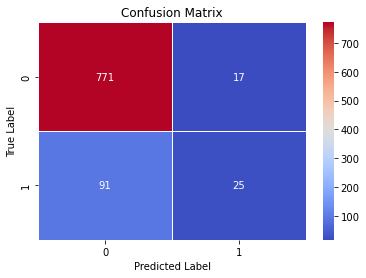


For KNeighborsClassifier, Accuracy score is 0.8672566371681416 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       788
           1       0.46      0.19      0.27       116

    accuracy                           0.87       904
   macro avg       0.67      0.58      0.60       904
weighted avg       0.83      0.87      0.84       904



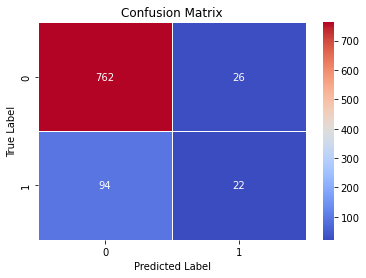


For RandomForestClassifier, Accuracy score is 0.8860619469026548 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       788
           1       0.71      0.19      0.30       116

    accuracy                           0.89       904
   macro avg       0.80      0.59      0.62       904
weighted avg       0.87      0.89      0.86       904



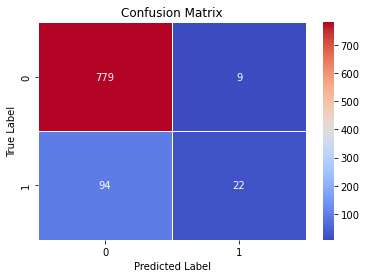


For LinearSVC, Accuracy score is 0.8738938053097345 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       788
           1       0.62      0.04      0.08       116

    accuracy                           0.87       904
   macro avg       0.75      0.52      0.51       904
weighted avg       0.84      0.87      0.82       904



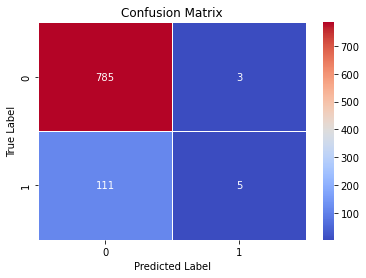

In [46]:
#create function to train a model and evaluate accuracy
def my_train2(model,X_train, X_val, y_train, y_val):
    
    #fit the model
    model.fit(X_train,y_train)
    
    #predict on the fitted model
    prediction = model.predict(X_val)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_val)))
    print(classification_report(y_val,prediction))
    plot_confusion_matrix(y_val,prediction)
    
#loop through each model
for model in models:
    my_train2(model,X_train, X_val, y_train, y_val)

### Predicting using the test dataset


For LogisticRegression, Accuracy score is 0.8928176795580111 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.51      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.71      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905



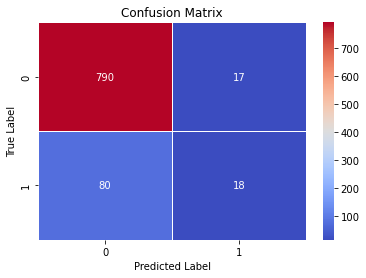


For KNeighborsClassifier, Accuracy score is 0.881767955801105 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       807
           1       0.43      0.27      0.33        98

    accuracy                           0.88       905
   macro avg       0.67      0.61      0.63       905
weighted avg       0.86      0.88      0.87       905



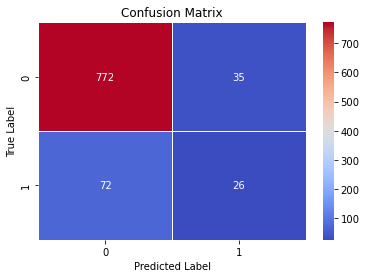


For RandomForestClassifier, Accuracy score is 0.8972375690607735 

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       807
           1       0.59      0.16      0.26        98

    accuracy                           0.90       905
   macro avg       0.75      0.57      0.60       905
weighted avg       0.87      0.90      0.87       905



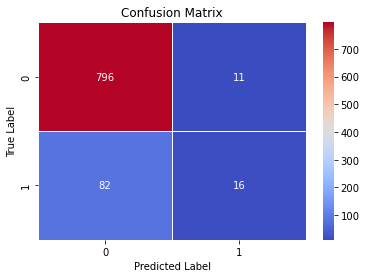


For LinearSVC, Accuracy score is 0.8895027624309392 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       807
           1       0.42      0.05      0.09        98

    accuracy                           0.89       905
   macro avg       0.66      0.52      0.52       905
weighted avg       0.84      0.89      0.85       905



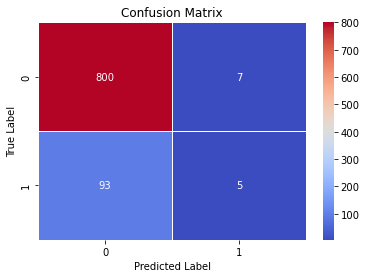

In [47]:
#create function to train a model and evaluate accuracy
def my_train(model,X_train,y_train,X_test,y_test):
    
  
    
    #predict on the fitted model
    prediction = model.predict(X_test)
    
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(y_test,prediction)
    
#loop through each model
for model in models:
    my_train(model,X_train,y_train,X_test,y_test)

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

- Based on the various algorithms used, we can see the various **accuracy scores** which tells us how accurate our model is, but this is only considered when the target class is balanced. In this dataset, the ratio of customers that will not subscribe to term deposit and those that will subscribe to term deposit is 4000:521 respectively. So using only accuracy to evaluate our model will not be a good idea as the model with be biased and make accurate predictions about the larger part of the dataset.


- With regards to **precision** it is a measure of the probability that our model is able to accurately predict that customers will subscribe to term deposit. This has to do with predictions that we get correct but actually are false.


- **Recall** on the other hand, is considered when you have to correctly predict an event that has occured already. It has to do with false predictions when actually they are correct.


In this case, we are considering the model with the highest accuracy and streamline down to precision and recall. Choosing a model with a higher **precision** is better because with regards to customers subscribing to the term deposit, we want to target those that will subscribe and by so doing help the business not to loose money in targeting customers that won't subscribe. 

However, if we predict that customers will not subscribe and they eventually subscribe, it wont be a loss to the business. This is where recall comes in.

## Summary

What model should be deployed to production?
Any other comments?

The model that should be deployed to production is **Random Forest model** as it has the highest accuracy and precision. The precision is a bit low and by optimizing and tuning our model we can get a more higher precision.

Choosing the correct metric for our model can actually increase its predictive power and give us a great competitive advantage.